# Analysis of Coaxial cable

Here we compare the attenuation and reflection coefficient of the two coaxial cables. We also look at how the silver coaxial cable calibrates with the VNA.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import os

from utils import dB_to_U

# modify this based on where you open the notebook
PATH_TO_DATA = os.path.join(os.getcwd(), "data")
coax_fname = "coax_{0}.csv"

coax_colors = ["silver", "brown", "blue"]
coax_datas = []

# import data
for i, coax_color in enumerate(coax_colors):
    # data has the following columns: resonant freq | transmission | reflection | transmission unc | reflection unc
    data = np.genfromtxt(os.path.join(PATH_TO_DATA, coax_fname.format(coax_color)), delimiter=",", missing_values=np.nan, filling_values=np.nan, skip_header=1)
    coax_datas.append(data.T)

### Transmission and Reflection of silver wire (Calibration test)

Below we evaluate the transmission and reflection of the silver wire (to which we calibrated to) to check if we have full transmission (as much as possible) and same with reflection (almost no reflection should be expected).

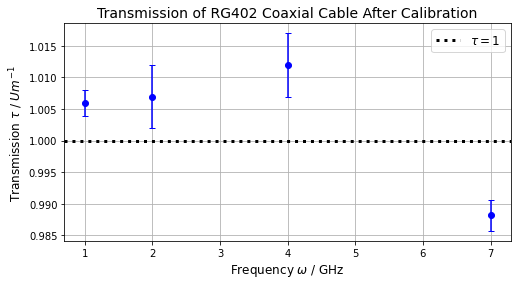

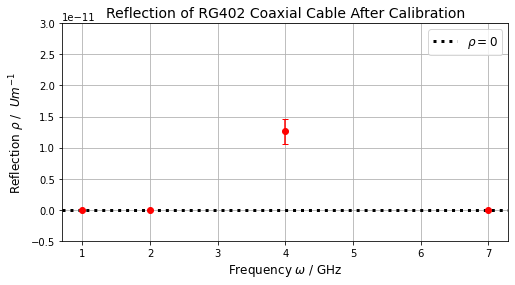

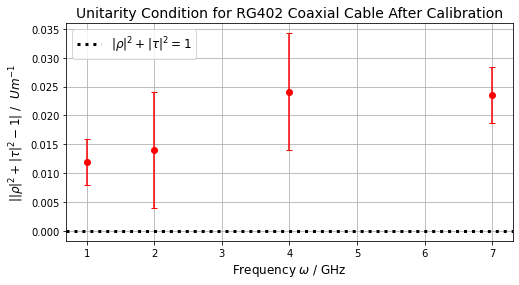

In [78]:
# plot silver wire first (this is the test case)

coax_silver = coax_datas[0]
coax_silver_U = np.zeros_like(coax_silver)

# get dB/m here (used )
coax_silver_pm = np.zeros_like(coax_silver)
coax_silver_l = 0.3020
coax_silver_lerr = 0.0010

coax_silver_pm[0,:] = coax_silver[0,:]
for i in [1,2]:
    coax_silver_pm[i,:] = coax_silver[i,:] / coax_silver_l
    coax_silver_pm[i+2,:] = np.sqrt((coax_silver[i,:] / coax_silver_l**2. * coax_silver_lerr)**2. + (coax_silver[i+2,:] / coax_silver_l)**2.)

# convert to U
coax_silver_U[0,:] = coax_silver_pm[0,:]
for i in [1,2]:
    coax_silver_U[i,:], coax_silver_U[i+2,:] = dB_to_U(coax_silver_pm[i,:], coax_silver_pm[i+2,:])

# transmission
fig, ax = plt.subplots(figsize=(8,4))
ax.errorbar(coax_silver_U[0,:], coax_silver_U[1,:], yerr=coax_silver_U[3,:], linestyle="", marker="o", capsize=3, color="b")
ax.axhline(1, color="k", ls=":", lw=3.0, label=r"$\tau = 1$")
ax.set_xlabel("Frequency $\omega$ / GHz", fontsize=12)
ax.set_ylabel(r"Transmission $\tau$ / $U m^{{-1}}$ ", fontsize=12)
ax.set_title("Transmission of RG402 Coaxial Cable After Calibration", fontsize=14)

ax.grid()
ax.legend(prop={"size":12})

# Reflection
fig, ax = plt.subplots(figsize=(8,4))
ax.errorbar(coax_silver_U[0,:], coax_silver_U[2,:], yerr=coax_silver_U[4,:], linestyle="", marker="o", capsize=3, color="r")
# ax.plot(coax_silver[0,:], dB_to_U(coax_silver[2,:]))
ax.axhline(0, color="k", ls=":", lw=3.0, label=r"$\rho = 0$")
ax.set_xlabel("Frequency $\omega$ / GHz", fontsize=12)
ax.set_ylabel(r"Reflection $\rho$ /  $U m^{{-1}}$", fontsize=12)
ax.set_title("Reflection of RG402 Coaxial Cable After Calibration", fontsize=14)
ax.set_ylim([-5e-12, 3e-11])

ax.grid()
ax.legend(prop={"size":12})

# transmission^2 + reflection^2 (should give 1, check test)
fig, ax = plt.subplots(figsize=(8,4))

coax_silver_sum = coax_silver_U[1,:]**2. + coax_silver_U[2,:]**2.

# error via error propagation, sqrt(2 ( * (tau * tau_err)^2 + (rho * rho_err)^2 ))
coax_silver_sum_err = 2 * np.sqrt((coax_silver_U[1,:] * coax_silver_U[3,:])**2. + (coax_silver_U[2,:] * coax_silver_U[4,:])**2)

ax.errorbar(coax_silver_U[0,:], np.abs(coax_silver_sum - 1), yerr=coax_silver_sum_err, linestyle="", marker="o", capsize=3, color="r")
# ax.plot(coax_silver[0,:], dB_to_U(coax_silver[2,:]))
ax.axhline(0, color="k", ls=":", lw=3.0, label=r"$|\rho|^2 + |\tau|^2 = 1$")
ax.set_xlabel("Frequency $\omega$ / GHz", fontsize=12)
ax.set_ylabel(r"$| |\rho|^2 + |\tau|^2 - 1|$ /  $U m^{{-1}}$", fontsize=12)
ax.set_title("Unitarity Condition for RG402 Coaxial Cable After Calibration", fontsize=14)
# ax.set_ylim([-5e-12, 3e-11])

ax.grid()
ax.legend(prop={"size":12})

### Transmission & Reflection of coaxial cables

Below we check tranmission and reflection of both wires (brown, blue)
Do this via for loop since process is essentially the same.

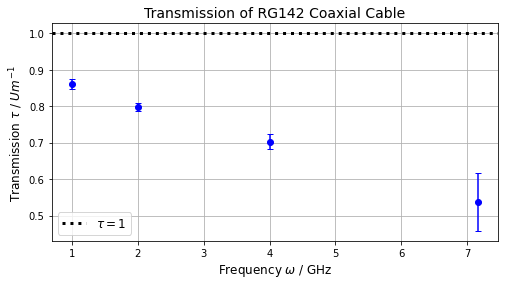

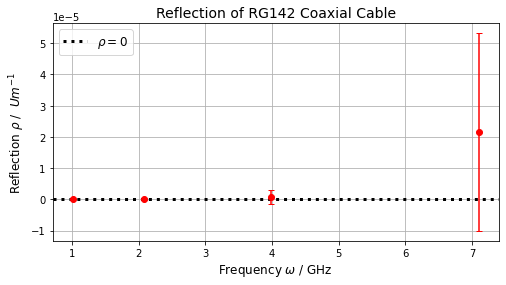

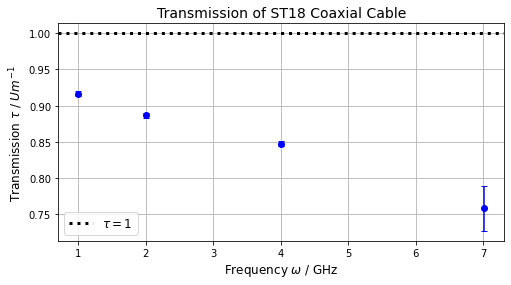

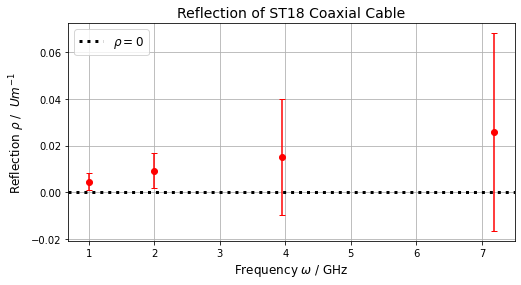

In [70]:
coax_names = ["RG142", "ST18"]
# coax_names = ["RG142"]
coax_lengths = [(0.5102, 0.0010), (1.8255, 0.0010)]   # in meters

coax_atten_arrs = []


for j, coax_name in enumerate(coax_names):
    idx = j + 1  # since we ignore the silver one
    coax_data = coax_datas[idx]
    coax_l, coax_lerr = coax_lengths[j]
    
    # get dB/m here (used )
    coax_pm = np.zeros_like(coax_data)

    coax_pm[0,:] = coax_data[0,:]
    for i in [1,2]:
        coax_pm[i,:] = coax_data[i,:] / coax_l
        coax_pm[i+2,:] = np.sqrt((coax_data[i,:] / coax_l**2. * coax_lerr)**2. + (coax_data[i+2,:] / coax_l)**2.)

    # convert to U
    coax_U = np.zeros_like(coax_data)
    coax_U[0,:] = coax_pm[0,:]
    for i in [1,2]:
        coax_U[i,:], coax_U[i+2,:] = dB_to_U(coax_pm[i,:], coax_pm[i+2,:])

    

    # transmission
    fig, ax = plt.subplots(figsize=(8,4))
    ax.errorbar(coax_U[0,:], coax_U[1,:], yerr=coax_U[3,:], linestyle="", marker="o", capsize=3, color="b")
    ax.axhline(1, color="k", ls=":", lw=3.0, label=r"$\tau = 1$")
    ax.set_xlabel("Frequency $\omega$ / GHz", fontsize=12)
    ax.set_ylabel(r"Transmission $\tau$ / $U m^{{-1}}$ ", fontsize=12)
    ax.set_title("Transmission of {0} Coaxial Cable".format(coax_name), fontsize=14)

    ax.grid()
    ax.legend(prop={"size":12})

    # Reflection
    fig, ax = plt.subplots(figsize=(8,4))
    ax.errorbar(coax_U[0,:], coax_U[2,:], yerr=coax_U[4,:], linestyle="", marker="o", capsize=3, color="r")
    # ax.plot(coax_silver[0,:], dB_to_U(coax_silver[2,:]))
    ax.axhline(0, color="k", ls=":", lw=3.0, label=r"$\rho = 0$")
    ax.set_xlabel("Frequency $\omega$ / GHz", fontsize=12)
    ax.set_ylabel(r"Reflection $\rho$ /  $U m^{{-1}}$", fontsize=12)
    ax.set_title("Reflection of {0} Coaxial Cable".format(coax_name), fontsize=14)
    # ax.set_ylim([-5e-12, 3e-11])

    ax.grid()
    ax.legend(prop={"size":12})


    # evaluate attenuation
    
    # remove all NaNs  for attenuation
    coax_atten = np.zeros((5,4))
    for i in range(4):
        coax_atten[i+1,:] = coax_U[i+1,~np.isnan(coax_U[i+1,:])]

    # set frequency values to be the same
    # 1,2,4,7
    coax_atten[0,:] = np.array([1,2,4,7])

    # append to list to separate analysis
    coax_atten_arrs.append(coax_atten)


### Attenuation for both cables

- need to check definition of attenuation since they dont seem to agree
  - attenuation: power loss so as frequency increases, transmission should go down (which is consistent)
  - reflection should then increase (more waves reflected so power is lost more (?))

Both cables are exhibiting such behaviour, but need some normalization factor since dB is in negative
- why? -> since reflection amplitude << transmission one 
  - so we need to somehow scale them to the same magnitude
  - but I think they already are (U m^-1)



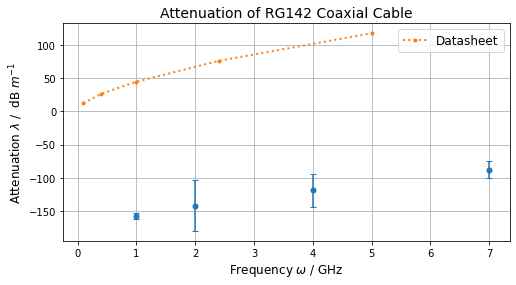

In [106]:
atten_thr_brown = [np.array([0.1, 0.4, 1, 2.4, 5]), np.array([12.47, 26.57, 44.95, 76.44, 118.11])]
atten_thr_blue =  [np.array([2, 4, 6]), np.array([0.89, 1.28, 1.58]) ]
coax_atten_brown = coax_atten_arrs[0]
# print(coax_U)
coax_name = "RG142"

# attentuation defined in dB, 20 * log10(P1 / P2)
# P1 is input power until termination by characteristic impedance (i.e. reflection)
# P2 is output power (i.e. transmission)
# need to add some factors to get the normalization correct
N  = 1e10   # some normalization to make equation positive
atten_brown = 20 * np.log10(N * coax_atten_brown[2,:] / coax_atten_brown[1,:])

# error of attenuation
atten_brown_err = (20 / np.log(10)) * np.sqrt((coax_atten_brown[3,:] / coax_atten_brown[1,:])**2. + (coax_atten_brown[4,:] / coax_atten_brown[2,:])**2.)
# print(atten)
fig, ax = plt.subplots(figsize=(8,4))
# print(i)

ax.errorbar(coax_atten_brown[0,:], atten_brown, yerr=atten_brown_err, marker="o", linestyle="", ms=5.0, capsize=3.0)
ax.plot(atten_thr_brown[0], atten_thr_brown[1], linestyle=":", marker="o", ms=3.0, label="Datasheet", lw=2.0)
ax.set_xlabel("Frequency $\omega$ / GHz", fontsize=12)
ax.set_ylabel(r"Attenuation $\lambda$ /  dB $m^{{-1}}$", fontsize=12)
ax.set_title("Attenuation of {0} Coaxial Cable".format(coax_name), fontsize=14)
# ax.set_ylim([-5e-12, 3e-11])

ax.grid()
ax.legend(prop={"size":12})

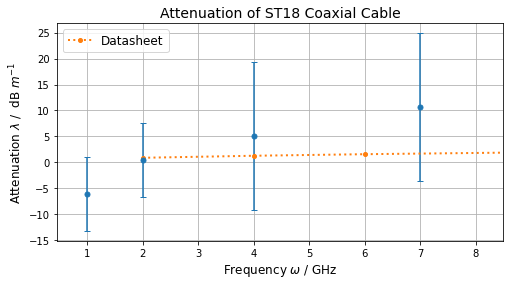

In [104]:
# atten_thr_brown = [np.array([0.1, 0.4, 1, 2.4, 5]), np.array([12.47, 26.57, 44.95, 76.44, 118.11])]
atten_thr_blue =  [np.array([2, 4, 6, 12]), np.array([0.89, 1.28, 1.58, 2.29]) ]
coax_atten_blue = coax_atten_arrs[1]
# print(coax_U)
coax_name = "ST18"

# attentuation defined in dB, 20 * log10(P1 / P2)
# P1 is input power until termination by characteristic impedance (i.e. reflection)
# P2 is output power (i.e. transmission)
# need to add some factors to get the normalization correct
N  = 1e2   # some normalization to make equation positive
atten_blue = 20 * np.log10(N * coax_atten_blue[2,:] / coax_atten_blue[1,:])

# error of attenuation
atten_blue_err = (20 / np.log(10)) * np.sqrt((coax_atten_blue[3,:] / coax_atten_blue[1,:])**2. + (coax_atten_blue[4,:] / coax_atten_blue[2,:])**2.)
# print(atten)
fig, ax = plt.subplots(figsize=(8,4))
# print(i)

ax.errorbar(coax_atten_blue[0,:], atten_blue, yerr=atten_blue_err, marker="o", linestyle="", ms=5.0, capsize=3.0)
ax.plot(atten_thr_blue[0], atten_thr_blue[1], linestyle=":", marker="o", ms=4.0, label="Datasheet", lw=2.0)
ax.set_xlabel("Frequency $\omega$ / GHz", fontsize=12)
ax.set_ylabel(r"Attenuation $\lambda$ /  dB $m^{{-1}}$", fontsize=12)
ax.set_title("Attenuation of {0} Coaxial Cable".format(coax_name), fontsize=14)
# ax.set_ylim([-5e-12, 3e-11])
ax.set_xlim(xmax=8.5)

ax.grid()
ax.legend(prop={"size":12})

### Scraps
junk used for testing, dont delete unless we are sure of our results

No handles with labels found to put in legend.
No handles with labels found to put in legend.


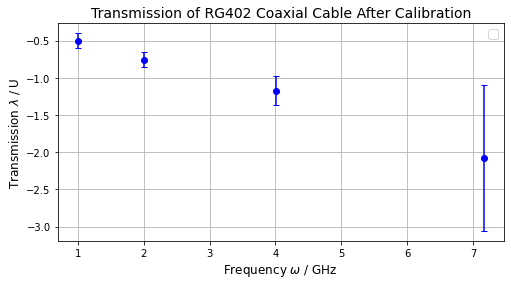

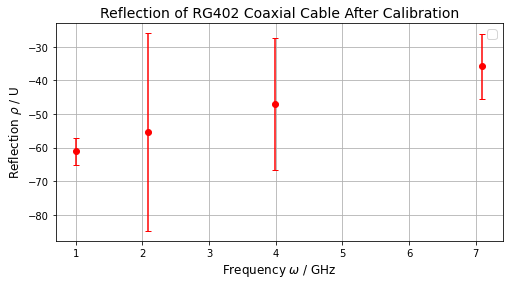

In [12]:
# # now plot brown wire transmission and reflection
# # also compare with analytical results

# # analytical results for attentuation
# # obtained from https://www.fairviewmicrowave.com/images/productPDF/RG142.pdf 
# # units for attenuation are in dB/100m, so need to multiply by 100 to get dB / m
# brown_atten_thr = [np.array([0.1, 0.4, 1, 2.4, 5]), np.array([12.47, 26.57, 44.95, 76.44, 118.11]) * 100]

# coax_brown = coax_data[1]

# # normalize by length

# coax_brown_l = 0.5102  # meter
# coax_brown_lerr = 0.001  # meter

# coax_brown_pm = np.zeros_like(coax_brown)

# coax_brown_pm[0,:] = coax_brown[0,:]
# for i in [1,2]:
#     coax_brown_pm[i,:] = coax_brown[i,:] / coax_brown_l
#     coax_brown_pm[i+2,:] = np.sqrt((coax_brown[i,:] / coax_brown_l**2. * coax_brown_lerr)**2. + (coax_brown[i+2,:] / coax_brown_l)**2.)

# # transmission
# fig, ax = plt.subplots(figsize=(8,4))
# ax.errorbar(coax_brown_pm[0,:], coax_brown_pm[1,:], yerr=coax_brown_pm[3,:], linestyle="", marker="o", capsize=3, color="b")
# # ax.plot(coax_brown_thr[0], [coax_brown_thr[1][i] / 100 for i in range(len(coax_brown_thr[1]))], linestyle=":", color="c", label="Analytical")
# # ax.axhline(1, color="k", ls=":", lw=3.0, label="$\lambda = 1$")
# ax.set_xlabel("Frequency $\omega$ / GHz", fontsize=12)
# ax.set_ylabel(r"Transmission $\tau$ / U", fontsize=12)
# ax.set_title("Transmission of RG402 Coaxial Cable After Calibration", fontsize=14)

# ax.grid()
# ax.legend(prop={"size":12})

# # Reflection
# fig, ax = plt.subplots(figsize=(8,4))
# ax.errorbar(coax_brown_pm[0,:], coax_brown_pm[2,:], yerr=coax_brown_pm[4,:], linestyle="", marker="o", capsize=3, color="r")
# ax.set_xlabel("Frequency $\omega$ / GHz", fontsize=12)
# ax.set_ylabel(r"Reflection $\rho$ / U", fontsize=12)
# ax.set_title("Reflection of RG402 Coaxial Cable After Calibration", fontsize=14)

# ax.grid()
# ax.legend(prop={"size":12})

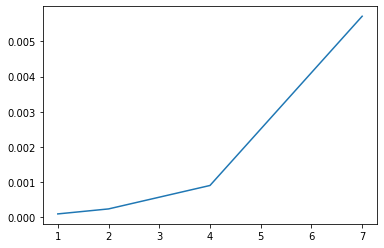

In [5]:
# coax_brown = coax_data[1]

# coax_brown1, coax_brown1err = dB_to_U(coax_brown[1,:], coax_brown[3,:])
# coax_brown2, coax_brown2err = dB_to_U(coax_brown[2,:], coax_brown[4,:])

# coax_brown1 = coax_brown1[~np.isnan(coax_brown1)]
# coax_brown2 = coax_brown2[~np.isnan(coax_brown2)]

# # plt.plot([1,2,4,7], 20*np.log10(np.abs(coax_brown1 / coax_brown2)) / coax_brown_l * 100)
# plt.plot([1,2,4,7], coax_brown2 / coax_brown1)
# # plt.plot(coax_brown_thr[0], [coax_brown_thr[1][i]*100 for i in range(len(coax_brown_thr[1]))])

# # # Reflection
# # fig, ax = plt.subplots(figsize=(8,4))
# # ax.errorbar(coax_brown_pm[0,:], coax_brown_pm[2,:], yerr=coax_brown_pm[4,:], linestyle="", marker="o", capsize=3, color="r")
# # ax.plot(coax_brown_thr[0], [coax_brown_thr[1][i] for i in range(len(coax_brown_thr[1]))], linestyle=":", color="c", label="Analytical")
# # # ax.plot(coax_silver[0,:], dB_to_U(coax_silver[2,:]))
# # # ax.axhline(0, color="k", ls=":", lw=3.0, label=r"$\rho = 0$")
# # ax.set_xlabel("Frequency $\omega$ / GHz", fontsize=12)
# # ax.set_ylabel(r"Reflection $\rho$ / U", fontsize=12)
# # ax.set_title("Reflection of RG402 Coaxial Cable After Calibration", fontsize=14)

# # ax.grid()
# # ax.legend(prop={"size":12})